<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_0_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n250.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.606864,45.769848,43.629204,38.071116,-0.424947,158.652086,159.058020,-0.405934
1,0.0,1.0,67.747669,38.923309,36.109753,82.459824,0.119118,235.359673,235.302584,0.057088
2,0.0,2.0,31.506649,36.257651,50.850415,81.857387,-0.142144,210.329959,210.483916,-0.153957
3,0.0,3.0,61.206785,34.997350,67.653946,92.742154,-0.322821,266.277414,266.656559,-0.379145
4,0.0,4.0,37.720522,39.270867,75.080191,66.386091,0.331085,228.788755,228.471039,0.317717
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.750974,53.272204,66.398283,39.915975,-0.122609,206.214827,206.360000,-0.145174
249996,999.0,246.0,69.372515,33.330212,69.811174,55.681539,-0.214307,237.981134,238.222886,-0.241751
249997,999.0,247.0,30.864381,52.514017,70.313811,93.627284,0.112123,257.431615,257.303672,0.127943
249998,999.0,248.0,45.676974,76.419974,52.688522,99.258363,-0.156819,283.887015,284.001284,-0.114269


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.606864,45.769848,43.629204,38.071116,-0.424947,158.652086,159.058020,-0.405934
1,0.0,1.0,67.747669,38.923309,36.109753,82.459824,0.119118,235.359673,235.302584,0.057088
2,0.0,2.0,31.506649,36.257651,50.850415,81.857387,-0.142144,210.329959,210.483916,-0.153957
3,0.0,3.0,61.206785,34.997350,67.653946,92.742154,-0.322821,266.277414,266.656559,-0.379145
4,0.0,4.0,37.720522,39.270867,75.080191,66.386091,0.331085,228.788755,228.471039,0.317717
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.750974,53.272204,66.398283,39.915975,-0.122609,206.214827,206.360000,-0.145174
249996,999.0,246.0,69.372515,33.330212,69.811174,55.681539,-0.214307,237.981134,238.222886,-0.241751
249997,999.0,247.0,30.864381,52.514017,70.313811,93.627284,0.112123,257.431615,257.303672,0.127943
249998,999.0,248.0,45.676974,76.419974,52.688522,99.258363,-0.156819,283.887015,284.001284,-0.114269


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.606864  45.769848  43.629204  38.071116 -0.424947  158.652086   
      1.0    67.747669  38.923309  36.109753  82.459824  0.119118  235.359673   
      2.0    31.506649  36.257651  50.850415  81.857387 -0.142144  210.329959   
      3.0    61.206785  34.997350  67.653946  92.742154 -0.322821  266.277414   
      4.0    37.720522  39.270867  75.080191  66.386091  0.331085  228.788755   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.750974  53.272204  66.398283  39.915975 -0.122609  206.214827   
      246.0  69.372515  33.330212  69.811174  55.681539 -0.214307  237.981134   
      247.0  30.864381  52.514017  70.313811  93.627284  0.112123  257.431615   
      248.0  45.676974  76.419974  52.688522  99.258363 -0.156819  283.887015   
      249.0  55.696972  34.296419  56.134506  86.749324 -0.335828  242.541393   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    159.058020 -0.405934  
      1.0    235.302584  0.057088  
      2.0    210.483916 -0.153957  
      3.0    266.656559 -0.379145  
      4.0    228.471039  0.317717  
...                 ...       ...  
999.0 245.0  206.360000 -0.145174  
      246.0  238.222886 -0.241751  
      247.0  257.303672  0.127943  
      248.0  284.001284 -0.114269  
      249.0  242.877108 -0.335715  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.606864  45.769848  43.629204  38.071116 -0.424947  158.652086   
      1.0    67.747669  38.923309  36.109753  82.459824  0.119118  235.359673   
      2.0    31.506649  36.257651  50.850415  81.857387 -0.142144  210.329959   
      3.0    61.206785  34.997350  67.653946  92.742154 -0.322821  266.277414   
      4.0    37.720522  39.270867  75.080191  66.386091  0.331085  228.788755   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.750974  53.272204  66.398283  39.915975 -0.122609  206.214827   
      246.0  69.372515  33.330212  69.811174  55.681539 -0.214307  237.981134   
      247.0  30.864381  52.514017  70.313811  93.627284  0.112123  257.431615   
      248.0  45.676974  76.419974  52.688522  99.258363 -0.156819  283.887015   
      249.0  55.696972  34.296419  56.134506  86.749324 -0.335828  242.541393   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    159.058020 -0.405934  
      1.0    235.302584  0.057088  
      2.0    210.483916 -0.153957  
      3.0    266.656559 -0.379145  
      4.0    228.471039  0.317717  
...                 ...       ...  
999.0 245.0  206.360000 -0.145174  
      246.0  238.222886 -0.241751  
      247.0  257.303672  0.127943  
      248.0  284.001284 -0.114269  
      249.0  242.877108 -0.335715  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.606864,45.769848,43.629204,38.071116,-0.424947,158.652086,159.058020,-0.405934
1,0.0,1.0,67.747669,38.923309,36.109753,82.459824,0.119118,235.359673,235.302584,0.057088
2,0.0,2.0,31.506649,36.257651,50.850415,81.857387,-0.142144,210.329959,210.483916,-0.153957
3,0.0,3.0,61.206785,34.997350,67.653946,92.742154,-0.322821,266.277414,266.656559,-0.379145
4,0.0,4.0,37.720522,39.270867,75.080191,66.386091,0.331085,228.788755,228.471039,0.317717
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,36.750974,53.272204,66.398283,39.915975,-0.122609,206.214827,206.360000,-0.145174
249996,999.0,246.0,69.372515,33.330212,69.811174,55.681539,-0.214307,237.981134,238.222886,-0.241751
249997,999.0,247.0,30.864381,52.514017,70.313811,93.627284,0.112123,257.431615,257.303672,0.127943
249998,999.0,248.0,45.676974,76.419974,52.688522,99.258363,-0.156819,283.887015,284.001284,-0.114269


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.606864  45.769848  43.629204  38.071116 -0.424947  158.652086   
      1.0    67.747669  38.923309  36.109753  82.459824  0.119118  235.359673   
      2.0    31.506649  36.257651  50.850415  81.857387 -0.142144  210.329959   
      3.0    61.206785  34.997350  67.653946  92.742154 -0.322821  266.277414   
      4.0    37.720522  39.270867  75.080191  66.386091  0.331085  228.788755   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  36.750974  53.272204  66.398283  39.915975 -0.122609  206.214827   
      246.0  69.372515  33.330212  69.811174  55.681539 -0.214307  237.981134   
      247.0  30.864381  52.514017  70.313811  93.627284  0.112123  257.431615   
      248.0  45.676974  76.419974  52.688522  99.258363 -0.156819  283.887015   
      249.0  55.696972  34.296419  56.134506  86.749324 -0.335828  242.541393   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    159.058020 -0.405934  
      1.0    235.302584  0.057088  
      2.0    210.483916 -0.153957  
      3.0    266.656559 -0.379145  
      4.0    228.471039  0.317717  
...                 ...       ...  
999.0 245.0  206.360000 -0.145174  
      246.0  238.222886 -0.241751  
      247.0  257.303672  0.127943  
      248.0  284.001284 -0.114269  
      249.0  242.877108 -0.335715  

[250000 rows x 8 columns]

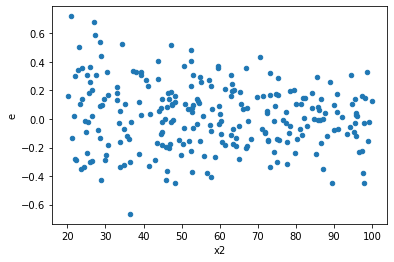

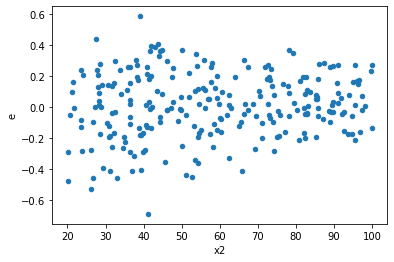

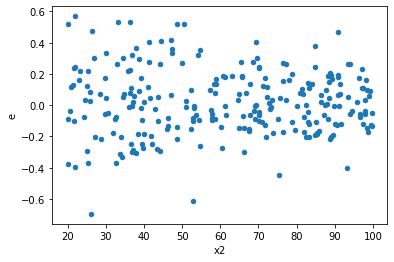

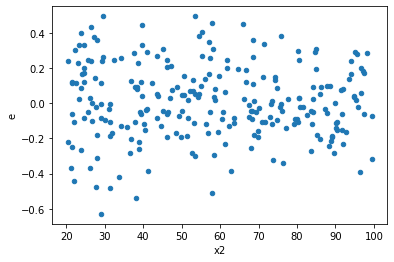

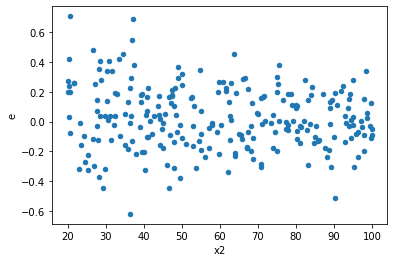

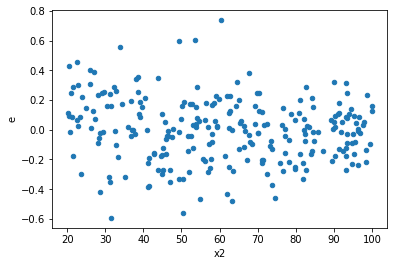

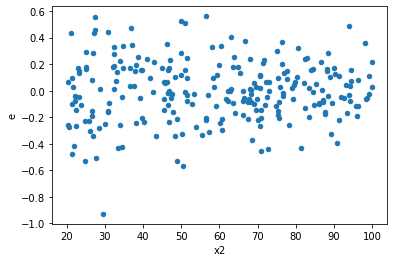

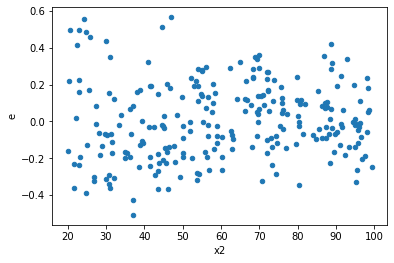

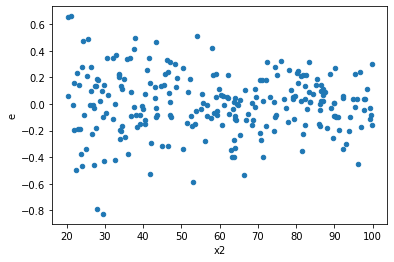

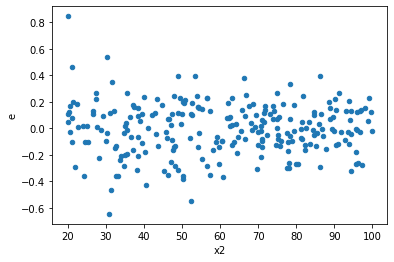

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]


    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,7.014738347090884,3.1658989311838837,0.07307019111553005,0.032978113866498786,0.4513210293149178,0.0001240436020929038,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,5.5126303813618325,2.38993833784082,0.05742323313918576,0.02489519101917521,0.4335386507902264,5.6555379850189487e-05,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,6.704525365964431,2.4509399137661627,0.06983880589546282,0.02553062410173086,0.3655650146702966,1.4419245692594047e-06,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,5.46183380008249,2.756423524572283,0.056894102084192606,0.028712745047627945,0.5046699744929354,0.0009335780308234028,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,5.230115577087355,2.6558437516301474,0.05448037059465995,0.027665039079480702,0.507798290971838,0.001036395854885007,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,5.5304917032237455,2.490874718338165,0.05760928857524735,0.025946611649355886,0.45038937801610374,0.00011922523651956244,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,6.595701618137915,3.0490027526903734,0.06870522518893661,0.031760445340524725,0.4622711773840312,0.00019523993860085637,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,5.916273791284806,2.5501130187642063,0.06162785199255006,0.026563677278793815,0.4310336385244287,5.03727922385803e-05,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,7.583912647022281,2.7744511081543726,0.07899909007314876,0.028900532376608046,0.3658337374499853,1.4665764743768023e-06,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    809
Reject001=1 : Homoscedasticity      191
Name: Result_test, dtype: int64